In [78]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df_red = pd.read_csv('data/winequality-red.csv', sep=';', index_col=0)
df_red.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


In [11]:
df_red.isna().sum(axis=0) 

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

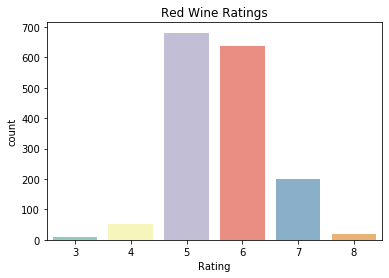

In [27]:
plt.figure()
sns.countplot(x='quality', data=df_red, palette="Set3")
plt.title('Red Wine Ratings')
plt.xlabel('Rating')
plt.show()

In [29]:
# Check linear relationship between two numeric variables 

corr_mat = df_red.corr()
corr_mat

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166


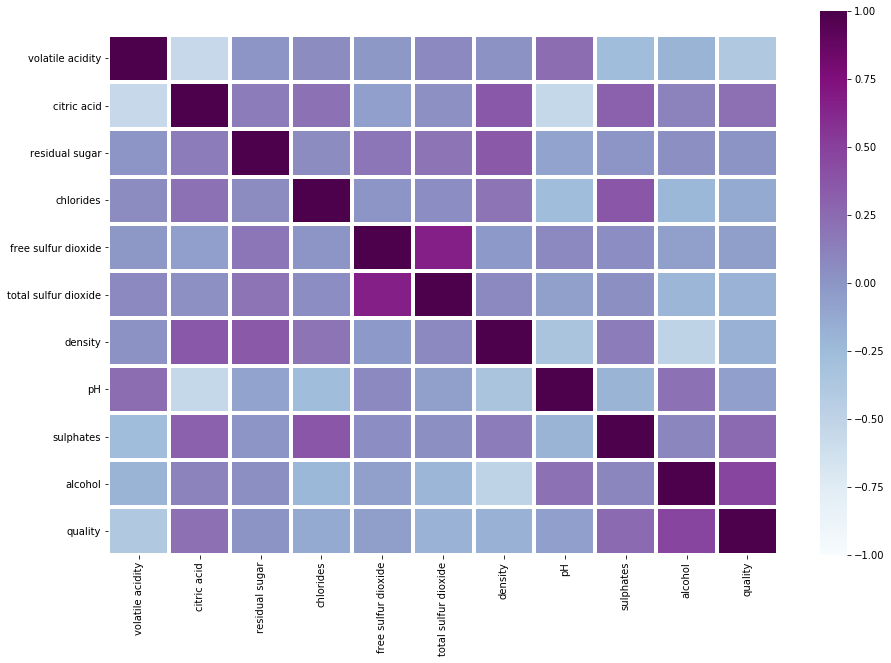

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,cmap='BuPu', center=0, linewidths=3, vmin=-1, vmax=1)

# This line is just a fix for a known matplotlib issue with heatmaps (may be fixed in later plt releases)
plt.ylim(len(df_red.columns),-0.5, -0.5)

plt.show()

In [51]:
columns = df_red.columns.drop(['quality'])

In [54]:
# Check correlations between target variable and any of the independent variables


list = []

for col in columns:
    
    X = df_red[col]
    y = df_red['quality']
    
    # Pull out correlation coefficient and p-value through pearsonr function
    corr, pval = stats.pearsonr(X, y)
    
    # Make a list containing the column names, the cofficient, the p-value
    # Assign the list to a variable
    corr_row = [col, corr, pval]
  
    # Append the list to the list we set up above
    list.append(corr_row)
  

In [56]:
list

[['volatile acidity', -0.39055778026400717, 2.0517148070151443e-59],
 ['citric acid', 0.22637251431804142, 4.9912952505121016e-20],
 ['residual sugar', 0.013731637340066275, 0.5832180131585295],
 ['chlorides', -0.1289065599300527, 2.3133826540602144e-07],
 ['free sulfur dioxide', -0.050656057244276353, 0.042833979508175565],
 ['total sulfur dioxide', -0.18510028892653785, 8.62170342366267e-14],
 ['density', -0.17491922778335012, 1.8749566520107985e-12],
 ['pH', -0.057731391205382135, 0.020962778651490887],
 ['sulphates', 0.2513970790692614, 1.8020884534533382e-24],
 ['alcohol', 0.476166324001136, 2.831476974778582e-91]]

In [65]:
# Pass it into a dataframe

list_df = pd.DataFrame(list, columns=['column_name','corr_coef','p_value'])
list_df

,column_name,corr_coef,p_value
0,volatile acidity,-0.390558,2.051715e-59
1,citric acid,0.226373,4.991295e-20
2,residual sugar,0.013732,5.832180e-01
3,chlorides,-0.128907,2.313383e-07
4,free sulfur dioxide,-0.050656,4.283398e-02
5,total sulfur dioxide,-0.185100,8.621703e-14
6,density,-0.174919,1.874957e-12
7,pH,-0.057731,2.096278e-02
8,sulphates,0.251397,1.802088e-24
9,alcohol,0.476166,2.831477e-91


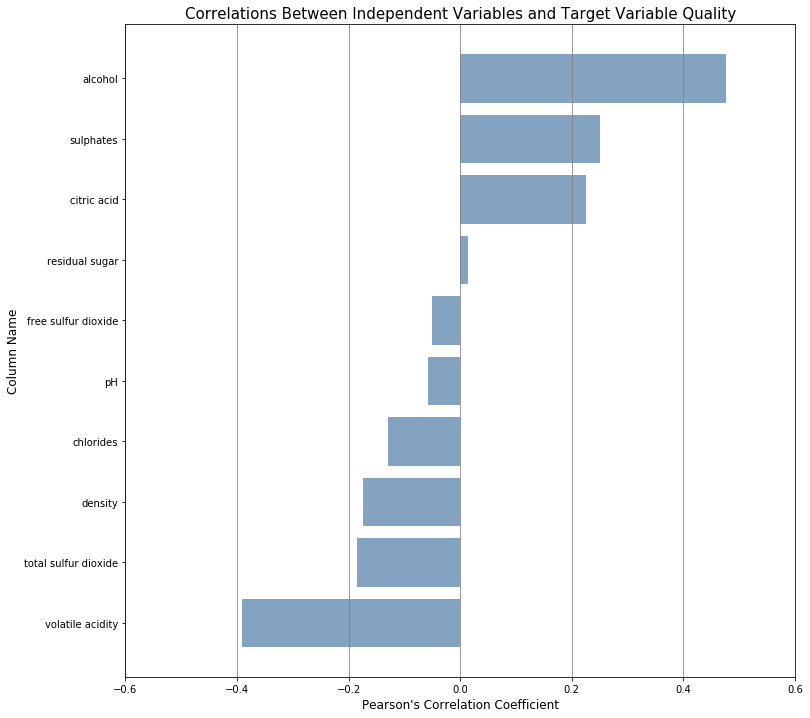

In [74]:

list_df_asc = list_df.sort_values('corr_coef', ascending=True)

# Bar plot
plt.figure(figsize=(12,12))
plt.barh(list_df_asc['column_name'], list_df_asc['corr_coef'],color=(0.2, 0.4, 0.6, 0.6))
plt.grid(axis='x', color='gray')
plt.xlim(-0.6, 0.6)
plt.title('Correlations Between Independent Variables and Target Variable Quality', size = 15)
plt.ylabel('Column Name', size=12)
plt.xlabel("Pearson's Correlation Coefficient", size=12)
plt.show()

In [76]:
X = df_red.drop(columns=['quality'])

y = df_red['quality']

In [79]:
# VIF check

pd.Series([variance_inflation_factor(X.values, i) 
          for i in range(X.shape[1])],
        index = X.columns).sort_values(ascending = False).round(3)

density                 799.060
pH                      742.868
alcohol                 123.023
sulphates                21.504
volatile acidity         16.098
citric acid               6.522
free sulfur dioxide       6.408
chlorides                 6.096
total sulfur dioxide      6.012
residual sugar            4.647
dtype: float64

If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. If the VIF is about 1.5, which indicates some correlation, but not enough to be overly concerned about. A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.


In [99]:
# Throw everything in: multiple linear regression

# Add a column of constants to X
X = sm.add_constant(X)

# Instantiate and fit the model
linreg = sm.OLS(y, X).fit()

# Look at the summary
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.39
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          2.92e-146
Time:                        23:44:09   Log-Likelihood:                -1569.6
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3220.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1796     13.437      0.460      0.646     -20.176      32.535
volatile acidity        -1.0778      0.121     -8.911      0.000      -1.315      -0.841
citric acid             -0.1353      0.139     -0.975      0.330      -0.407       0.137
residual sugar           0.0101      0.014      0.746      0.456      -0.016       0.037
chlorides               -1.9685      0.408     -4.828      0.000      -2.768      -1.169
free sulfur dioxide      0.0046      0.002      2.128      0.034       0.000       0.009
total sulfur dioxide    -0.0034      0.001     -4.835      0.000      -0.005      -0.002
density                 -1.5167     13.389     -0.113      0.910     -27.779      24.745
pH                      -0.5462      0.133     -4.099      0.000      -0.808      -0.285
sulphates                0.8996      0.113      7.961      0.000       0.678       1.121
alcohol                  0.2901      0.022     13.047      0.000       0.246       0.334
==============================================================================
Omnibus:                       25.101   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.849
Skew:                          -0.159   Prob(JB):                     9.96e-09
Kurtosis:                       3.672   Cond. No.                     7.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Four p-values were very high that we can't reject H0, and can't say they are able to significantly predict quality. Now, I will do backward selection and sequentially drop the variables density, residual suguar, citric acid that with high p-value.¶

In [101]:
# Drop density and fit a new model again

# Instantiate and fit the model
linreg_new1 = sm.OLS(y, X.drop(columns=['density'])).fit()

# Look at the summary
linreg_new1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     99.39
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          2.86e-147
Time:                        23:52:00   Log-Likelihood:                -1569.6
No. Observations:                1599   AIC:                             3159.
Df Residuals:                    1589   BIC:                             3213.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6583      0.461     10.103      0.000       3.754       5.563
volatile acidity        -1.0815      0.116     -9.292      0.000      -1.310      -0.853
citric acid             -0.1426      0.123     -1.160      0.246      -0.384       0.099
residual sugar           0.0094      0.012      0.782      0.434      -0.014       0.033
chlorides               -1.9616      0.403     -4.867      0.000      -2.752      -1.171
free sulfur dioxide      0.0046      0.002      2.128      0.033       0.000       0.009
total sulfur dioxide    -0.0034      0.001     -4.889      0.000      -0.005      -0.002
pH                      -0.5465      0.133     -4.103      0.000      -0.808      -0.285
sulphates                0.8969      0.110      8.121      0.000       0.680       1.114
alcohol                  0.2917      0.017     16.955      0.000       0.258       0.325
==============================================================================
Omnibus:                       25.081   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.843
Skew:                          -0.159   Prob(JB):                     9.99e-09
Kurtosis:                       3.672   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared doesen't change but the p-value of residual sugar and citric acid slightly decrease. I will drop these these two variables with high p-value.

In [103]:
# Drop residual sugar, citric acid and fit a new model again

# Instantiate and fit the model
linreg_new2 = sm.OLS(y, X.drop(columns=['residual sugar', 'citric acid'])).fit()

# Look at the summary
linreg_new2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     111.6
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          6.01e-148
Time:                        23:55:24   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3159.
Df Residuals:                    1590   BIC:                             3207.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.3113     10.647      0.687      0.492     -13.572      28.195
volatile acidity        -1.0120      0.101    -10.028      0.000      -1.210      -0.814
chlorides               -2.0208      0.398     -5.080      0.000      -2.801      -1.241
free sulfur dioxide      0.0051      0.002      2.381      0.017       0.001       0.009
total sulfur dioxide    -0.0035      0.001     -5.074      0.000      -0.005      -0.002
density                 -2.8429     10.498     -0.271      0.787     -23.434      17.748
pH                      -0.4905      0.121     -4.051      0.000      -0.728      -0.253
sulphates                0.8880      0.112      7.951      0.000       0.669       1.107
alcohol                  0.2869      0.019     15.119      0.000       0.250       0.324
==============================================================================
Omnibus:                       23.891   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.701
Skew:                          -0.154   Prob(JB):                     2.92e-08
Kurtosis:                       3.652   Cond. No.                     5.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the final model: About 36% of the variance in quality.
Pick one independent variable and interpret it: With one unit increase in alcohol, there’s a 0.2869 increase in quality.

Shapiro-Wilk test results:(0.9914240837097168, 4.7139241843296986e-08)


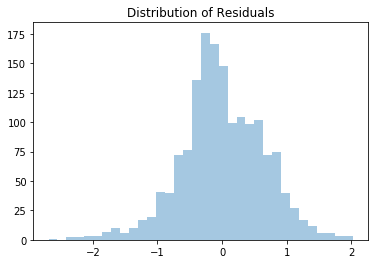

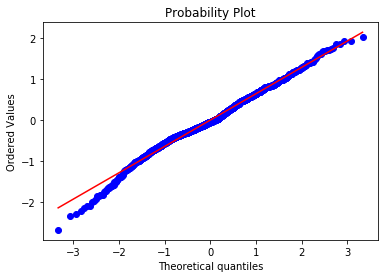

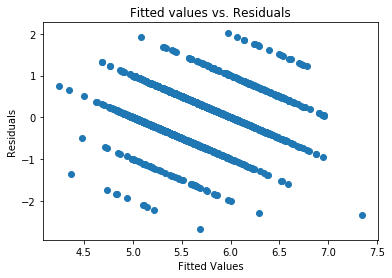

In [105]:
# Check residuals after fitting model

resids = linreg_new2.resid
fittedvals = linreg_new2.fittedvalues

#  Shapiro-Wilk test 
print(f'Shapiro-Wilk test results:{stats.shapiro(resids)}')
      
# Histogram
plt.figure()
sns.distplot(resids, kde= False)
plt.title('Distribution of Residuals')
plt.show()
      
# Normal Q-Q plot
plt.figure()
stats.probplot(resids, dist='norm',plot=plt)
plt.show()
      
# Regplot
plt.figure()
plt.scatter(fittedvals, resids)
plt.title('Fitted values vs. Residuals')      
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')    
plt.show()   